In [1]:
import pandas as pd
from pandas import Series
import numpy as np
from datetime import datetime 
import warnings
import matplotlib.pyplot as plt
%matplotlib inline


# Understanding Data

In [2]:
train_data=pd.read_csv("train_data.csv")
test_data=pd.read_csv("test_data.csv")

In [3]:
train_data

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [4]:
train_data.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [5]:
test_data.columns

Index(['ID', 'Datetime'], dtype='object')

In [6]:
train_data.shape # columns * rows

(18288, 3)

In [7]:
test_data.shape

(5112, 2)

# Exploration and preprocessing :
    a) Feature Extraction

In [8]:
train_data['Datetime'] = pd.to_datetime(train_data.Datetime,format="%d-%m-%Y %H:%M")
test_data['Datetime']=pd.to_datetime(test_data.Datetime,format="%d-%m-%Y %H:%M")

In [9]:
train_data['Datetime']

0       2012-08-25 00:00:00
1       2012-08-25 01:00:00
2       2012-08-25 02:00:00
3       2012-08-25 03:00:00
4       2012-08-25 04:00:00
                ...        
18283   2014-09-25 19:00:00
18284   2014-09-25 20:00:00
18285   2014-09-25 21:00:00
18286   2014-09-25 22:00:00
18287   2014-09-25 23:00:00
Name: Datetime, Length: 18288, dtype: datetime64[ns]

In [10]:


for i in (train_data,test_data):
    i['year']=i['Datetime'].dt.year
    i['month']=i['Datetime'].dt.month
    i['day']=i['Datetime'].dt.day
    i['Hour']=i['Datetime'].dt.hour

In [11]:
train_data['dayOfWeek'] = train_data['Datetime'].dt.dayofweek

In [12]:
temp = train_data['Datetime']

In [13]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [14]:
temp2 = train_data['Datetime'].apply(applyer)

In [15]:
train_data['weekend']=temp2

In [16]:
# for plotting
train_data.index=train_data['Datetime']

In [17]:
df=train_data.drop('ID',1)
ts=df['Count']

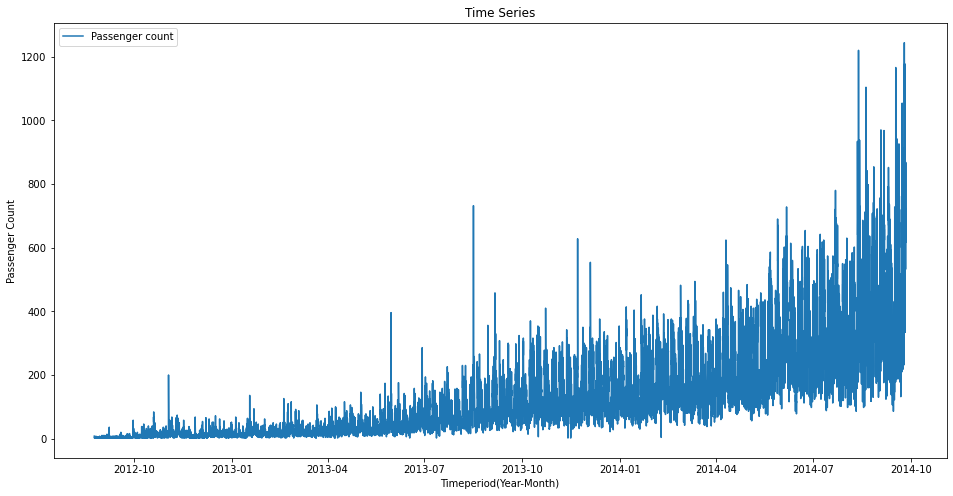

In [18]:

plt.figure(figsize=(16,8))
plt.plot(ts,label="Passenger count")
plt.title('Time Series')
plt.xlabel('Timeperiod(Year-Month)')
plt.ylabel('Passenger Count')
plt.legend(loc='best')

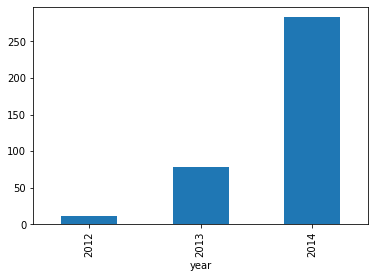

In [19]:
train_data.groupby('year')['Count'].mean().plot.bar()  # Yearly

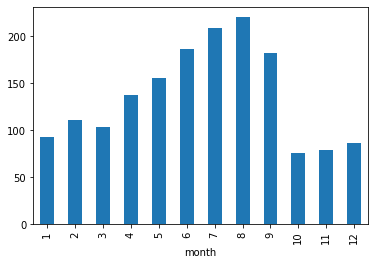

In [20]:
train_data.groupby('month')['Count'].mean().plot.bar()  #Monthly

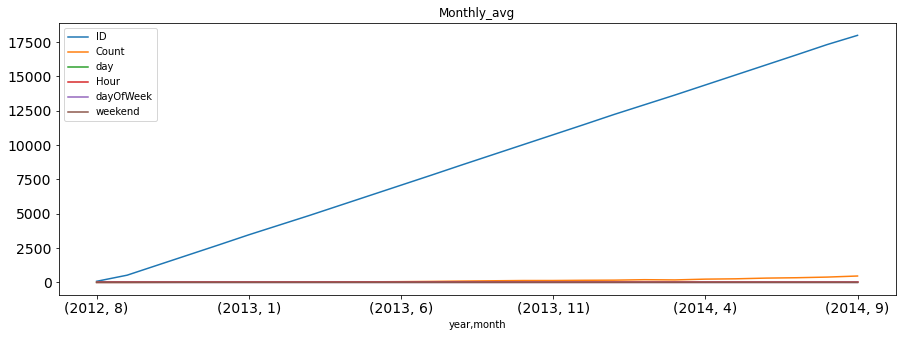

In [21]:
temp = train_data.groupby(['year','month']).mean()
temp.plot(figsize=(15,5),title='Monthly_avg',fontsize=14)

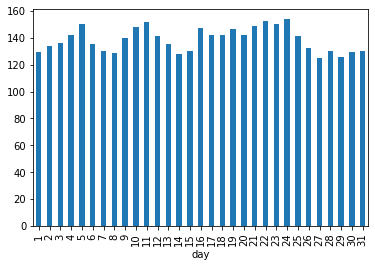

In [22]:
train_data.groupby('day')['Count'].mean().plot.bar()

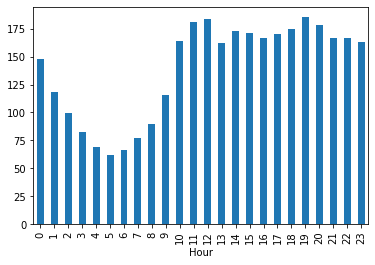

In [23]:
train_data.groupby('Hour')['Count'].mean().plot.bar()

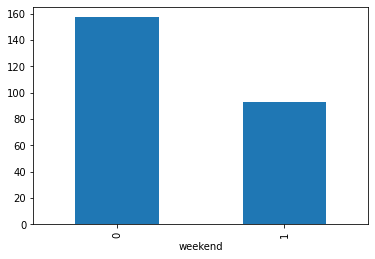

In [24]:
train_data.groupby('weekend')['Count'].mean().plot.bar()

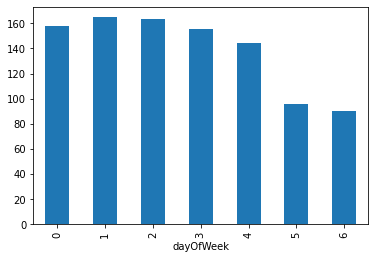

In [25]:
train_data.groupby('dayOfWeek')['Count'].mean().plot.bar()

In [26]:
train_data=train_data.drop('ID',1)

In [27]:
train_data.Timestamp=pd.to_datetime(train_data.Datetime,format='%d-%m-%Y %H:%M')

<ipython-input-27-1cf3bc7370c9>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  train_data.Timestamp=pd.to_datetime(train_data.Datetime,format='%d-%m-%Y %H:%M')


In [28]:
train_data.index = train_data.Timestamp

In [29]:
train_data

,Datetime,Count,year,month,day,Hour,dayOfWeek,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...,...
2014-09-25 19:00:00,2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,2014-09-25 21:00:00,702,2014,9,25,21,3,0


In [30]:
#Resampling
hourly  = train_data.resample('H').mean()
daily  = train_data.resample('D').mean()
Weekly  = train_data.resample('W').mean()
Monthly  = train_data.resample('M').mean()

c:\users\htcuser.ctlt140\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\htcuser.ctlt140\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\htcuser.ctlt140\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start 

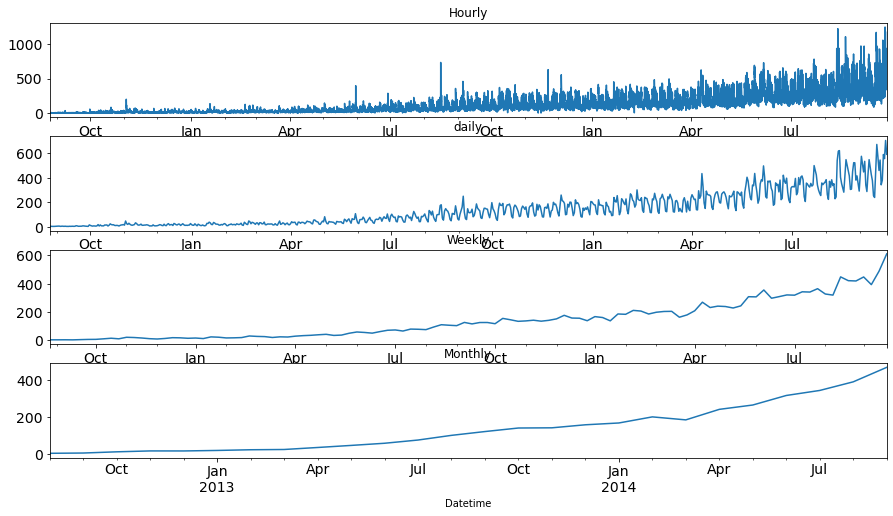

In [31]:
fig,axs=plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8),title='Hourly',fontsize=14,ax=axs[0])
daily.Count.plot(figsize=(15,8),title='daily',fontsize=14,ax=axs[1])
Weekly.Count.plot(figsize=(15,8),title='Weekly',fontsize=14,ax=axs[2])
Monthly.Count.plot(figsize=(15,8),title='Monthly',fontsize=14,ax=axs[3])
plt.show()

In [32]:
test_data.Timestamp=pd.to_datetime(test_data.Datetime,format='%d-%m-%Y %H:%M')

<ipython-input-32-036c24cff81b>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test_data.Timestamp=pd.to_datetime(test_data.Datetime,format='%d-%m-%Y %H:%M')


In [33]:
test_data.index=test_data.Timestamp

In [34]:
test_data=test_data.resample('D').mean()

In [35]:
train_data.Timestamp=pd.to_datetime(train_data.Datetime,format='%d-%m-%Y %H:%M')
train_data=train_data.resample('D').mean()

# Splitting the data into train and test dataset

In [36]:
traindata_set=train_data['2012-08-25':'2014-06-24']
validation_set=train_data['2014-06-25':'2014-09-25']

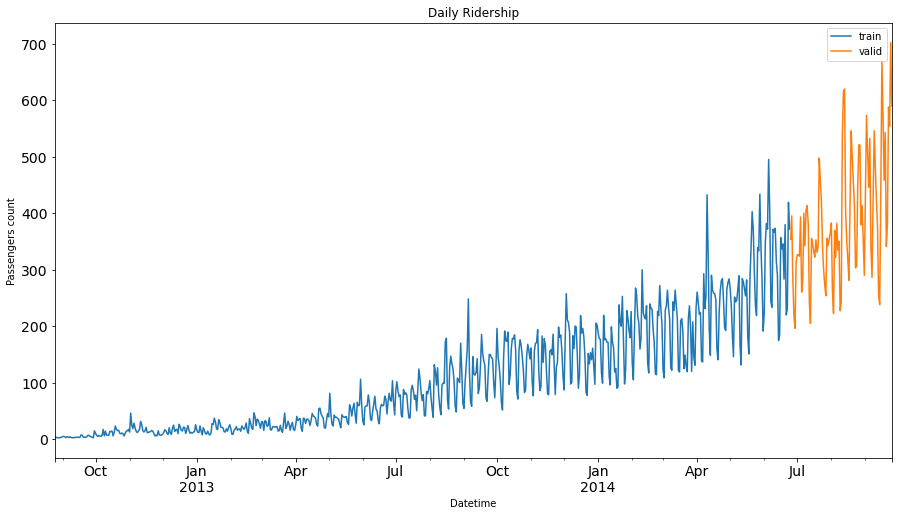

In [37]:
traindata_set.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='train')
validation_set.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passengers count")
plt.legend(loc='best')
plt.show()

# Modelling Techniques
a)Naive Approach

In [38]:
dd=np.asarray(traindata_set.Count)
len(dd)

669

In [39]:
y_hat=validation_set.copy()

In [40]:
y_hat['Naive']=dd[len(dd)-1]

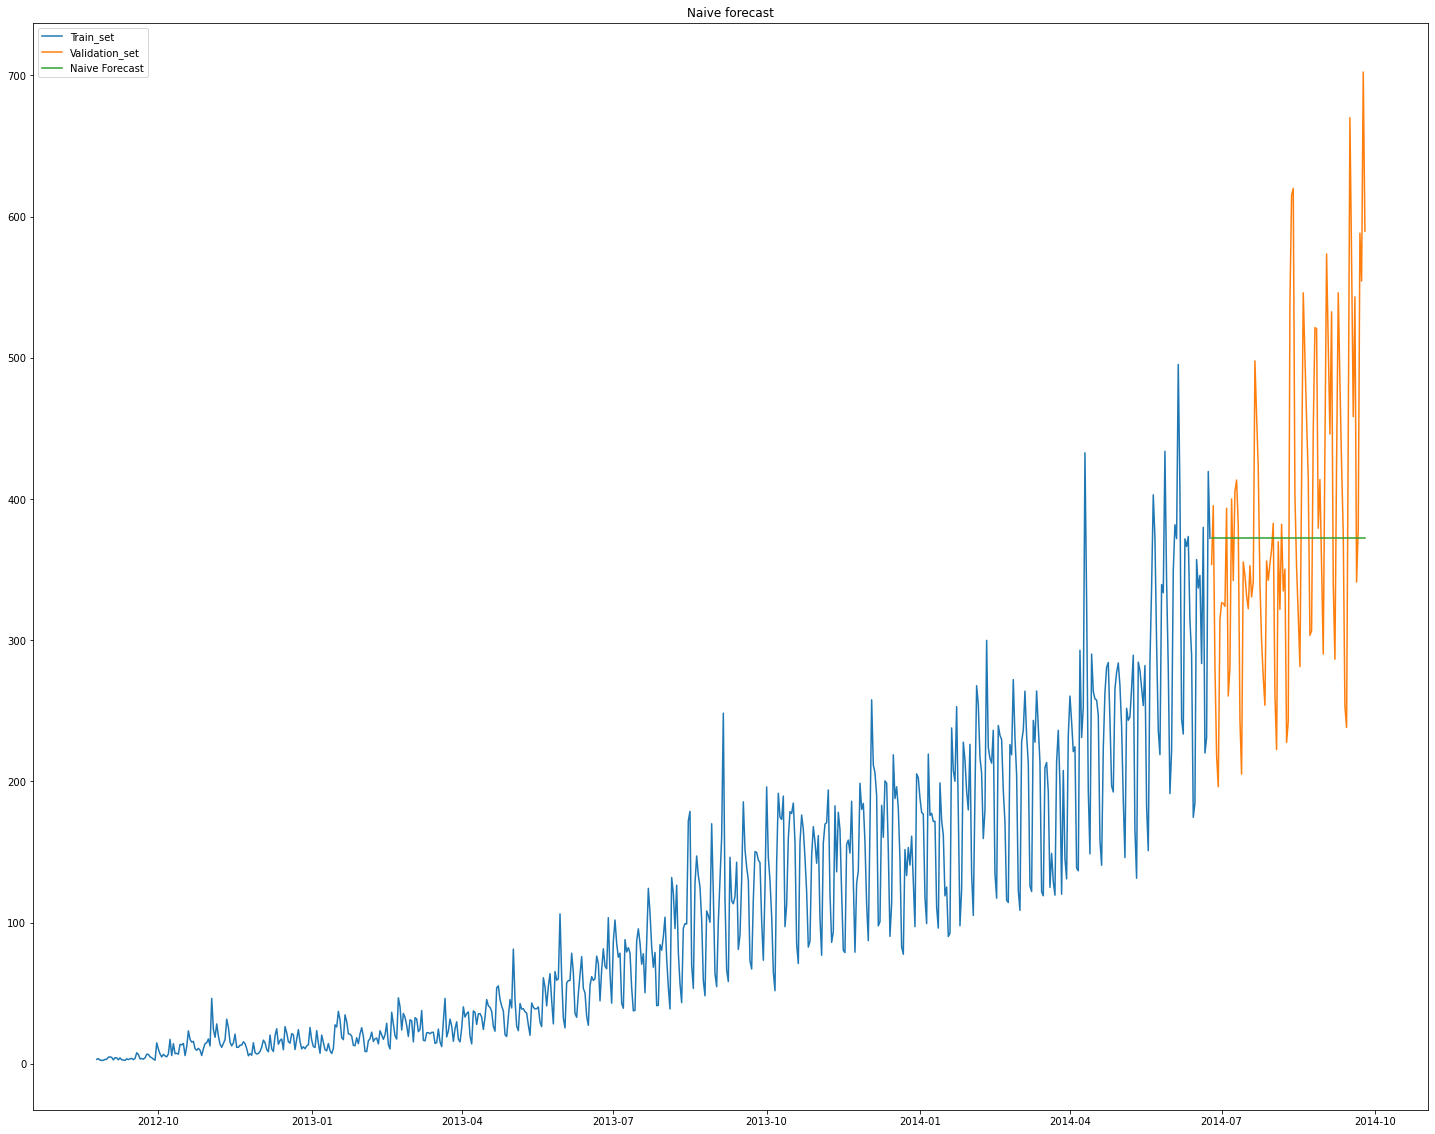

In [41]:
plt.figure(figsize=(25,20))
plt.plot(traindata_set.index,traindata_set['Count'],label='Train_set')
plt.plot(validation_set.index,validation_set['Count'],label='Validation_set')
plt.plot(y_hat.index,y_hat['Naive'],label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive forecast")
plt.show()

# Checking the accuracy -RMSE

In [42]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

In [43]:
rmse=sqrt(mean_squared_error(validation_set.Count,y_hat.Naive))

In [44]:
print(rmse)

111.79050467496724


# 4.Holts linear method #2.Moving average , 3. Exponential smoothing

In [45]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [46]:
import statsmodels.api as sm

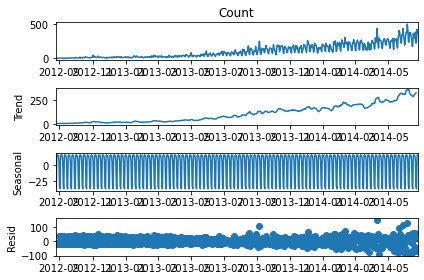

In [47]:
sm.tsa.seasonal_decompose(traindata_set.Count).plot()
result= sm.tsa.stattools.adfuller(traindata_set.Count)
plt.show()

#1.Original 2.Trend 3.Seasonality 4.Residual

In [48]:
y_hat_avg=validation_set.copy()

In [49]:
fit1= Holt(np.asarray(traindata_set['Count'])).fit(smoothing_level=0.3,smoothing_slope=0.1)

c:\users\htcuser.ctlt140\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [50]:
y_hat_avg['Holt_linear']=fit1.forecast(len(validation_set))

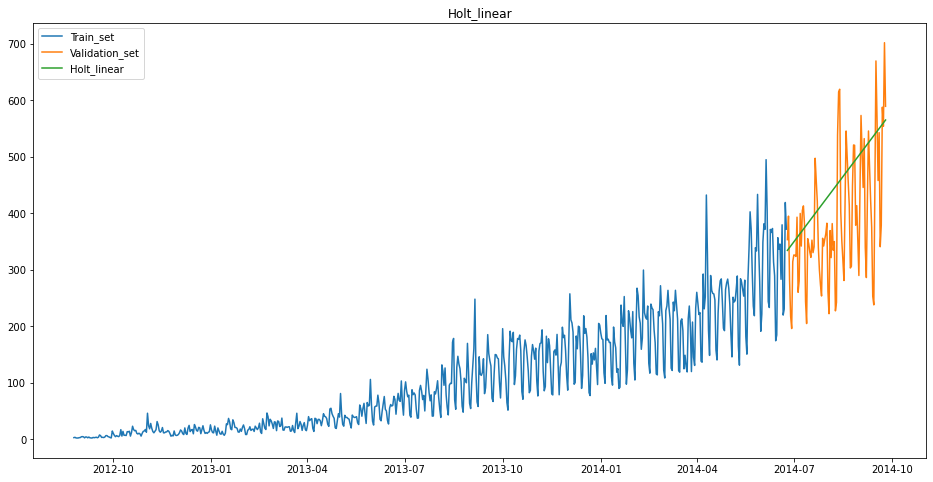

In [51]:
plt.figure(figsize=(16,8))
plt.plot(traindata_set['Count'],label='Train_set')
plt.plot(validation_set['Count'],label='Validation_set')
plt.plot(y_hat_avg['Holt_linear'],label='Holt_linear')
plt.legend(loc='best')
plt.title("Holt_linear")
plt.show()

In [52]:
rmse=sqrt(mean_squared_error(validation_set.Count,y_hat_avg.Holt_linear))

In [53]:
rmse

112.94278345314041

# Holt's Linear trend model on daily time series

In [54]:
submission_dataset=pd.read_csv("sample_submission.csv")

In [55]:
predict=fit1.forecast(len(test_data))

In [56]:
test_data['prediction']=predict

In [57]:
#calculating the hourly ratio of the count
train_data['ratio']=train_data['Count']/train_data['Count'].sum()

In [58]:
#Grouping the hourly ratio
temp=train_data.groupby(['Hour'])['ratio'].sum()

In [59]:
#Group by to csv format
pd.DataFrame(temp,columns=['Hour','ratio']).to_csv('Groupby.csv')

In [60]:
temp2=pd.read_csv('Groupby.csv')

In [61]:
temp2=temp2.drop('Hour.1',1)

In [62]:
merge=test_data

In [63]:
merge=merge.drop(['year','month'],axis=1)

In [64]:
prediction=pd.merge(merge,temp2,on='Hour',how='left')

In [65]:
#Converting the ratio to original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [66]:
prediction
submission=prediction.drop(['day','Hour','prediction','ratio'],axis=1)

In [67]:
pd.DataFrame(submission,columns=['ID','Count']).to_csv('Holts_linear1.csv')

## calculate rmse

In [68]:
#rmse=sqrt(mean_squared_error())

# Holt Winter's model on daily time series -- Use for seasonality and trend

In [69]:
y_hat_avg=validation_set.copy()

In [70]:
fit1=ExponentialSmoothing(np.asarray(train_data['Count']),seasonal_periods=7,trend='add',seasonal='add').fit()

c:\users\htcuser.ctlt140\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
c:\users\htcuser.ctlt140\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [71]:
y_hat_avg['Holts_Winter']=fit1.forecast(len(validation_set))

In [72]:
y_hat_avg

,Count,year,month,day,Hour,dayOfWeek,weekend,Holts_Winter
Datetime,,,,,,,,
2014-06-25,353.666667,2014.0,6.0,25.0,11.5,2.0,0.0,564.847173
2014-06-26,395.250000,2014.0,6.0,26.0,11.5,3.0,0.0,442.412401
2014-06-27,282.333333,2014.0,6.0,27.0,11.5,4.0,0.0,437.072160
2014-06-28,218.250000,2014.0,6.0,28.0,11.5,5.0,1.0,609.500253
2014-06-29,196.250000,2014.0,6.0,29.0,11.5,6.0,1.0,670.341359
...,...,...,...,...,...,...,...,...
2014-09-21,379.250000,2014.0,9.0,21.0,11.5,6.0,1.0,731.855154
2014-09-22,588.166667,2014.0,9.0,22.0,11.5,0.0,0.0,715.068359
2014-09-23,554.333333,2014.0,9.0,23.0,11.5,1.0,0.0,615.276526


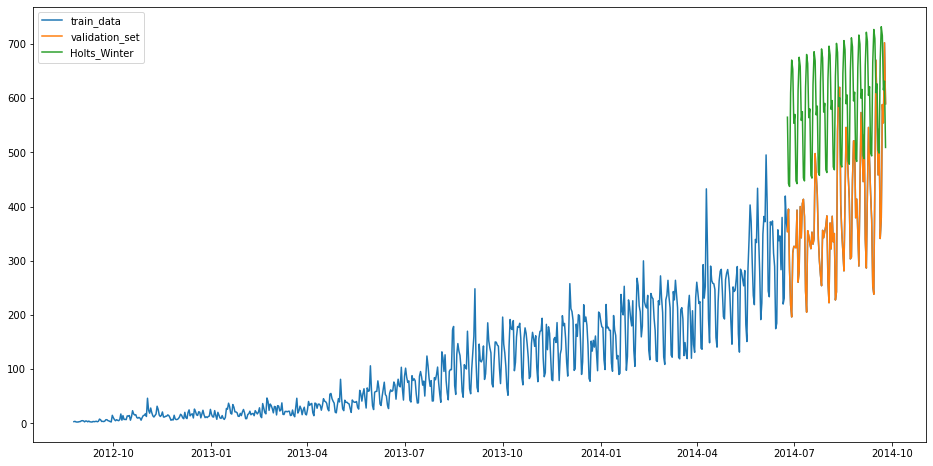

In [73]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Count'],label='train_data')
plt.plot(validation_set['Count'],label='validation_set')
plt.plot(y_hat_avg['Holts_Winter'],label='Holts_Winter')
plt.legend(loc='best')
plt.show()

In [74]:
rmse=sqrt(mean_squared_error(validation_set.Count,y_hat_avg.Holts_Winter))

In [75]:
rmse

251.72892303640185

In [76]:
predict=fit1.forecast(len(test_data))

In [77]:
test_data['prediction']=predict

In [78]:
merge=test_data

In [79]:
merge=merge.drop(['year','month','day'],axis=1)

In [80]:
merge

,ID,Hour,prediction
Datetime,,,
2014-09-26,18299.5,11.5,564.847173
2014-09-27,18323.5,11.5,442.412401
2014-09-28,18347.5,11.5,437.072160
2014-09-29,18371.5,11.5,609.500253
2014-09-30,18395.5,11.5,670.341359
...,...,...,...
2015-04-22,23291.5,11.5,802.212901
2015-04-23,23315.5,11.5,702.421068
2015-04-24,23339.5,11.5,718.631659


In [81]:
prediction=pd.merge(merge,temp2,on='Hour',how='left')

In [82]:
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [83]:
submission=prediction.drop(columns=['Hour','prediction','ratio'],axis=1)

In [84]:
submission

,ID,Count
0,18299.5,13556.332157
1,18323.5,10617.897618
2,18347.5,10489.731829
3,18371.5,14628.006065
4,18395.5,16088.192624
...,...,...
208,23291.5,19253.109634
209,23315.5,16858.105629
210,23339.5,17247.159818
211,23363.5,14308.725279


In [85]:
pd.DataFrame(submission,columns=['ID','Count']).to_csv("Holts_Winter_seasonality.csv")

# ARIMA Model - Parameter tuning

In [86]:
from statsmodels.tsa.stattools import adfuller

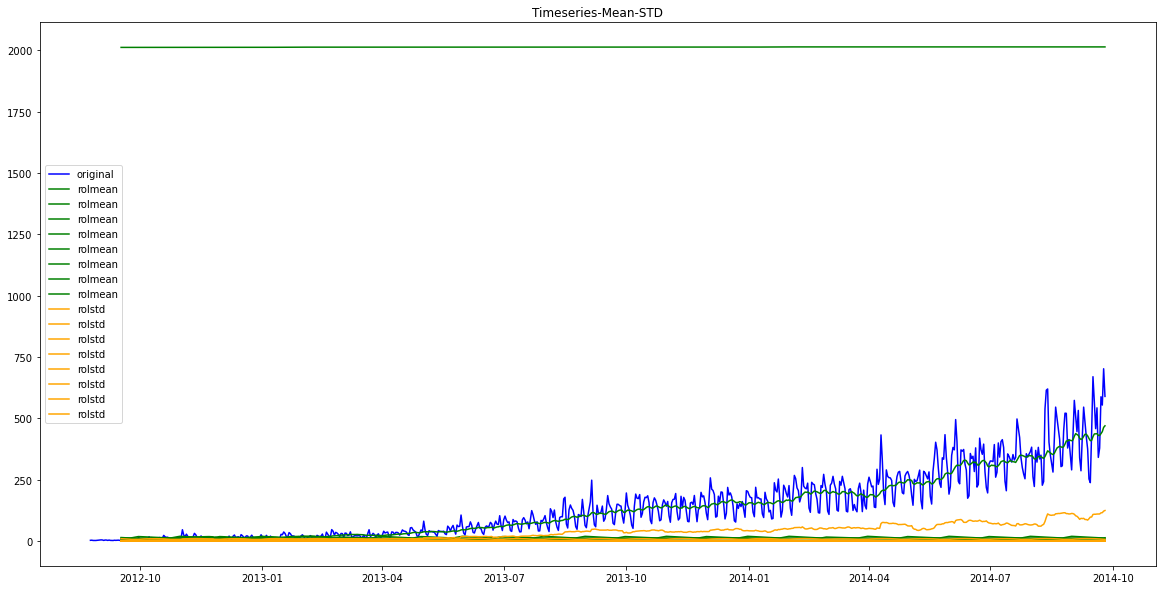

Results of duckers fillers test:
Test Statistic                   2.986351
p-value                          1.000000
#Lags Used                      20.000000
Number of Observations Used    741.000000
Critical value (1%)             -3.439206
Critical value (5%)             -2.865448
Critical value (10%)            -2.568851
dtype: float64


In [87]:
def stationary_test(timeseries):
    #Determining rolling stats
    rolmean=train_data.rolling(24).mean()
    rolstd=train_data.rolling(24).std()
    # Performing rolling stats
    org=plt.plot(timeseries,label='original',color='blue')
    rlmean=plt.plot(rolmean,label='rolmean',color='green')
    rlstd=plt.plot(rolstd,label='rolstd',color='orange')
    plt.legend(loc='best')
    plt.title('Timeseries-Mean-STD')
    plt.show(block='false')
    # performing duckers test
    print("Results of duckers fillers test:")
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value
    print(dfoutput)
    
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
stationary_test(train_data['Count'])
    

In [88]:
#Removing trend to make data morestationary since test statistic > critical value==nul hypothesis is acceptable
Train_log=np.log(train_data.Count)
valid_log=np.log(validation_set.Count)

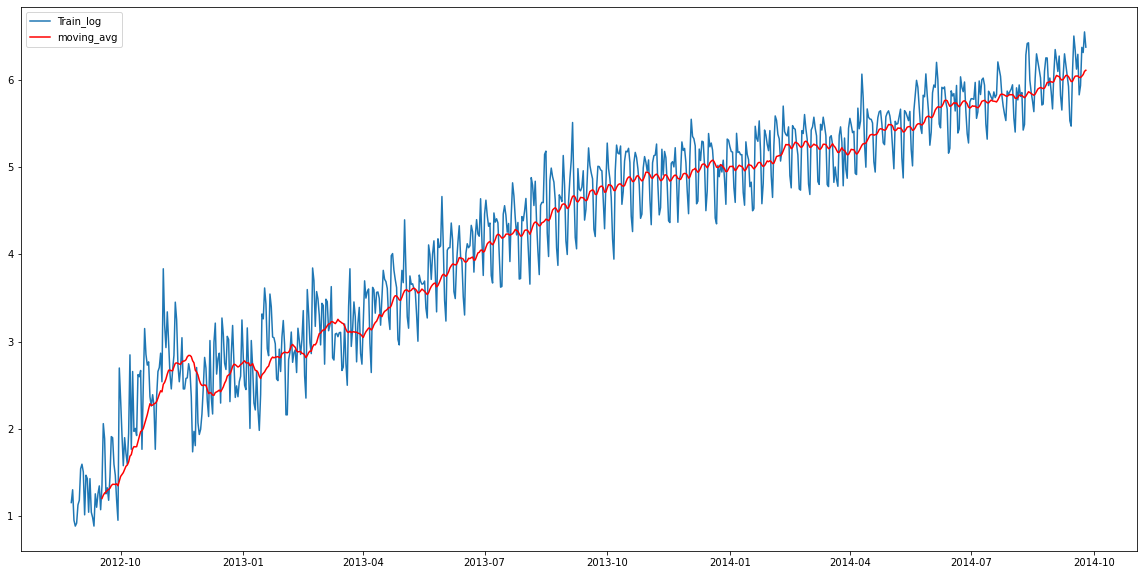

In [92]:
moving_avg=Train_log.rolling(24).mean()
plt.plot(Train_log,label='Train_log')
plt.plot(moving_avg,color='red',label='moving_avg')
plt.legend(loc='best')
plt.show()

In [93]:
train_log_moving_avg_diff=Train_log-moving_avg

In [95]:
train_log_moving_avg_diff.dropna(inplace=True)

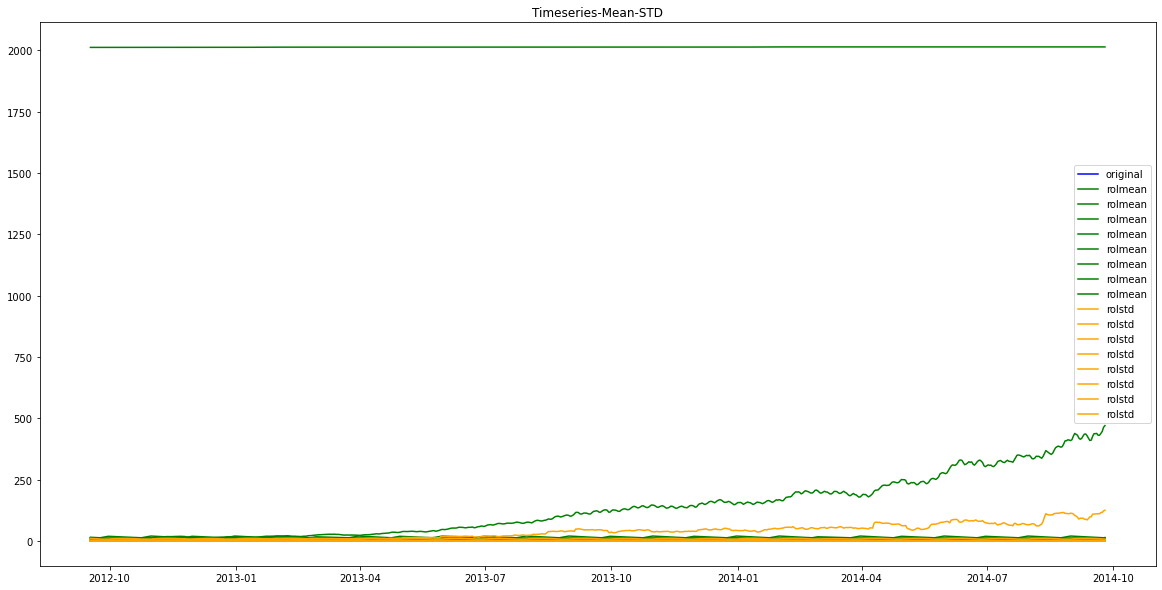

Results of duckers fillers test:
Test Statistic                -6.294458e+00
p-value                        3.533739e-08
#Lags Used                     2.000000e+01
Number of Observations Used    7.180000e+02
Critical value (1%)           -3.439490e+00
Critical value (5%)           -2.865574e+00
Critical value (10%)          -2.568918e+00
dtype: float64


In [96]:
stationary_test(train_log_moving_avg_diff)

In [ ]:
# Test statistic is very less compared to critical value..so trend is removed.. now stabilize mean
